# Pymaceuticals Inc.

Analysis

* OBSERVED TREND 1: 
* The Capomulin group was the only group that yielded a decrease in tumor volume(with a average change of -19.48% in tumor volume after 45 days). Both the Infubinol group and the Ketapril group had similar tumor volume changes(46.12% and 57.03%, respectively) with the Placebo group(51.30%), after 45 days of drug use. A steady decrease in tumor volume was observed in the Capomulin group, compared with a steady increase in all other groups including the Placebo group.
* OBSERVED TREND 2:
* The largest amount of survival occurred in the Capomulin group(84%).
* OBSERVED TREND 3: 
* During the 45 day experiment, more metastatic sites were observed in the Placebo group than all other groups. The Capomulin group had the least amount of metastatic sites.

In [1]:
# Dependencies
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Using pandas to read csv files in data frame formats
clinical_trial = pd.read_csv("raw_data/clinicaltrial_data.csv")
mouse_drug = pd.read_csv("raw_data/mouse_drug_data.csv")

# merge dataframes into one
df = pd.merge(left=clinical_trial, right=mouse_drug, on="Mouse ID", how="outer")
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


# Tumor Response to Treatment

In [2]:
# Groupby dataframe
drug_time_group = df.groupby(["Drug", "Timepoint"])
tumor_response = drug_time_group["Tumor Volume (mm3)"].mean().to_frame()
tumor_response

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
...                                 ...
Ramicane  0                   45.000000
          5                   43.944859
          10                  42.531957
          15                  41.495061
          20                  40.238325
          25                  38.974300
          30                  38.703137
          35                  37.451996
          40                  36.574081
          45                  34.955595
Stelasyn  0                   45.000000
          5                   47.527452
          10                  49.463844
          15                  51.529409
          20                  54.067395
          25                  56.166123
          30                  59.826738
          35                  62.440699
          40                  65.356386
          45                  68.438310
Zoniferol 0                   45.000000
          5                   46.851818
          10                  48.689881
          15                  50.779059
          20                  53.170334
          25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [3]:
# Pivot dataframe so that each drug is in one column
tumor_response = tumor_response.reset_index().pivot("Timepoint", "Drug", "Tumor Volume (mm3)")
tumor_response = tumor_response[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
tumor_response.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417


In [4]:
# Set linewidth of borders
matplotlib.rcParams["axes.linewidth"] = 3

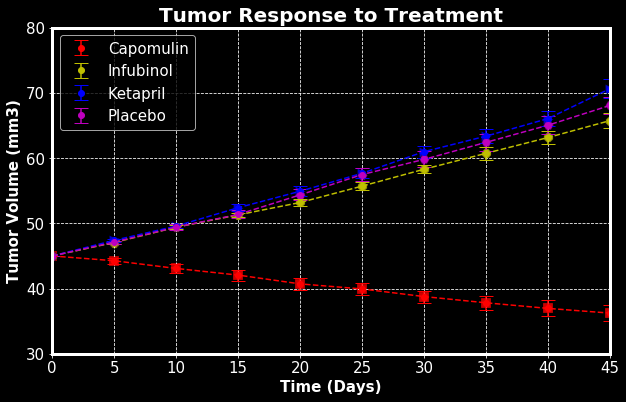

In [5]:
# Reset indext so that "Timepoints" is in one column
tumor_response = tumor_response.reset_index()

# Calculate sem
errors = drug_time_group.sem()
errors = errors.reset_index().pivot("Timepoint", "Drug", "Tumor Volume (mm3)")
errors = errors[["Capomulin", "Infubinol", "Ketapril", "Placebo"]].reset_index()

# Set background and font size
plt.style.use("dark_background")
matplotlib.rcParams.update({"font.size": 15})

# Plot a scatter plot
y = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
color = ["r", "y", "b", "m"]
ax = tumor_response.plot(kind="scatter", x="Timepoint", y=y[0], legend=False, alpha=.8, edgecolor="k", marker="s", s=100, linewidth=0.3, color=color[0], label=y[0], figsize=(10,6));
tumor_response.plot(kind="scatter", x="Timepoint", y=y[1], legend=False, alpha=.8, edgecolor="k", marker="8", s=100, linewidth=0.3, color=color[1], label=y[1], ax=ax);
tumor_response.plot(kind="scatter", x="Timepoint", y=y[2], legend=False, alpha=.8, edgecolor="k", marker=">", s=100, linewidth=0.3, color=color[2], label=y[2], ax=ax);
tumor_response.plot(kind="scatter", x="Timepoint", y=y[3], legend=False, alpha=.8, edgecolor="k", marker="H", s=100, linewidth=0.3, color=color[3], label=y[3], ax=ax)

# Plot error bars
for i in range(4):
    ax.errorbar(tumor_response["Timepoint"], tumor_response[y[i]], yerr=errors[y[i]], fmt="o", capsize=7, color=color[i], data=errors)

# Set styles
plt.legend()
plt.grid()
plt.xlim(0, 45)
plt.ylim(30, 80)
plt.title("Tumor Response to Treatment", fontsize=20, fontweight="bold")
ax.set_xlabel("Time (Days)", weight="bold")
plt.ylabel("Tumor Volume (mm3)", weight="bold")
plt.grid(ls="--")

# Plot dashed lines
for i in range(4):
    plt.plot(tumor_response["Timepoint"], tumor_response[y[i]], color[i]+"--")
plt.show()

# Metastatic Response to Treatment

In [6]:
# Groupby dataframe
drug_time_group = df.groupby(["Drug", "Timepoint"])
metastatic_response = drug_time_group["Metastatic Sites"].mean().to_frame()
metastatic_response

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190
Ceftamin  0                  0.000000
          5                  0.380952
          10                 0.600000
          15                 0.789474
          20                 1.111111
          25                 1.500000
          30                 1.937500
          35                 2.071429
          40                 2.357143
          45                 2.692308
Infubinol 0                  0.000000
          5                  0.280000
          10                 0.666667
          15                 0.904762
          20                 1.050000
          25                 1.277778
          30                 1.588235
          35                 1.666667
          40                 2.100000
          45                 2.111111
...                               ...
Ramicane  0                  0.000000
          5                  0.120000
          10                 0.250000
          15                 0.333333
          20                 0.347826
          25                 0.652174
          30                 0.782609
          35                 0.952381
          40                 1.100000
          45                 1.250000
Stelasyn  0                  0.000000
          5                  0.240000
          10                 0.478261
          15                 0.782609
          20                 0.952381
          25                 1.157895
          30                 1.388889
          35                 1.562500
          40                 1.583333
          45                 1.727273
Zoniferol 0                  0.000000
          5                  0.166667
          10                 0.500000
          15                 0.809524
          20                 1.294118
          25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [7]:
# Pivot dataframe so that each drug is in one column
metastatic_response = metastatic_response.reset_index().pivot("Timepoint", "Drug", "Metastatic Sites")
metastatic_response = metastatic_response[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
metastatic_response.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316


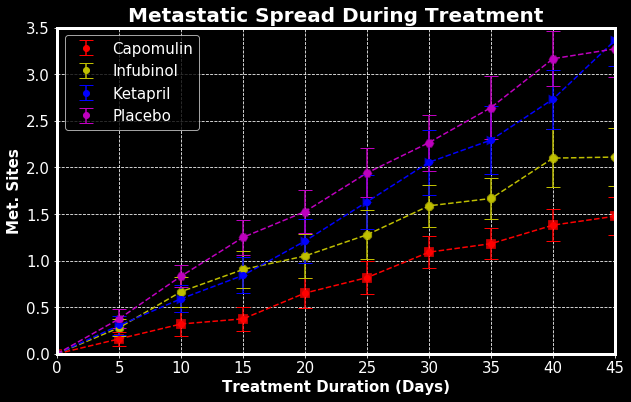

In [8]:
# Reset indext so that "Timepoints" is in one column
metastatic_response = metastatic_response.reset_index()

# Calculate sem
errors = drug_time_group.sem()
errors = errors.reset_index().pivot("Timepoint", "Drug", "Metastatic Sites")
errors = errors[["Capomulin", "Infubinol", "Ketapril", "Placebo"]].reset_index()

# Set background and font size
plt.style.use("dark_background")
matplotlib.rcParams.update({"font.size": 15})

# Plot a scatter plot
y = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
color = ["r", "y", "b", "m"]
ax = metastatic_response.plot(kind="scatter", x="Timepoint", y=y[0], legend=False, alpha=.8, edgecolor="k", marker="s", s=100, linewidth=0.3, color=color[0], label=y[0], figsize=(10,6));
metastatic_response.plot(kind="scatter", x="Timepoint", y=y[1], legend=False, alpha=.8, edgecolor="k", marker="8", s=100, linewidth=0.3, color=color[1], label=y[1], ax=ax);
metastatic_response.plot(kind="scatter", x="Timepoint", y=y[2], legend=False, alpha=.8, edgecolor="k", marker=">", s=100, linewidth=0.3, color=color[2], label=y[2], ax=ax);
metastatic_response.plot(kind="scatter", x="Timepoint", y=y[3], legend=False, alpha=.8, edgecolor="k", marker="H", s=100, linewidth=0.3, color=color[3], label=y[3], ax=ax)

# Plot error bars
for i in range(4):
    ax.errorbar(metastatic_response["Timepoint"], metastatic_response[y[i]], yerr=errors[y[i]], fmt="o", capsize=7, color=color[i], data=errors)

# Set styles
plt.legend()
plt.grid()
plt.xlim(0, 45)
plt.ylim(0,3.5)
plt.title("Metastatic Spread During Treatment", fontsize=20, fontweight="bold")
ax.set_xlabel("Treatment Duration (Days)", weight="bold")
plt.ylabel("Met. Sites", weight="bold")
plt.grid(ls="--")

# Plot dashed lines
for i in range(4):
    plt.plot(metastatic_response["Timepoint"], metastatic_response[y[i]], color[i]+"--")
plt.show()

# Survival Rates

In [9]:
# Groupby dataframe
drug_time_group = df.groupby(["Drug", "Timepoint"])
survival = drug_time_group["Mouse ID"].count().to_frame()
survival

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23
          25               22
          30               22
          35               22
          40               21
          45               21
Ceftamin  0                25
          5                21
          10               20
          15               19
          20               18
          25               18
          30               16
          35               14
          40               14
          45               13
Infubinol 0                25
          5                25
          10               21
          15               21
          20               20
          25               18
          30               17
          35               12
          40               10
          45                9
...                       ...
Ramicane  0                25
          5                25
          10               24
          15               24
          20               23
          25               23
          30               23
          35               21
          40               20
          45               20
Stelasyn  0                26
          5                25
          10               23
          15               23
          20               21
          25               19
          30               18
          35               16
          40               12
          45               11
Zoniferol 0                25
          5                24
          10               22
          15               21
          20               17
          25               16
          30               15
          35               14
          40               14
          45               14

[100 rows x 1 columns]

In [10]:
# Pivot dataframe so that each drug is in one column
survival = survival.reset_index().pivot("Timepoint", "Drug", "Mouse ID")
survival = survival[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
survival_rates = survival.divide(25).multiply(100)
survival_rates.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0


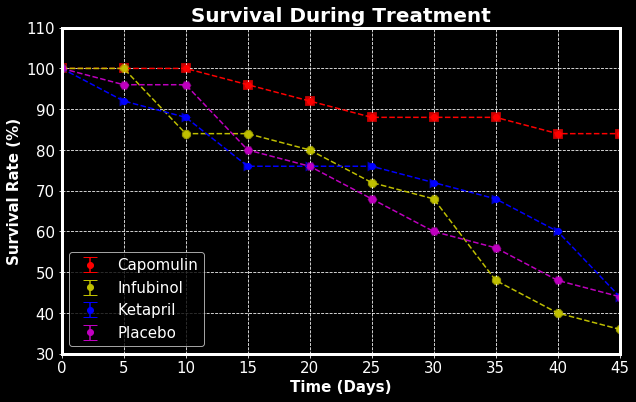

In [11]:
# Reset indext so that "Timepoints" is in one column
survival_rates = survival_rates.reset_index()

# Calculate sem
errors = drug_time_group.sem()
errors = errors.reset_index().pivot("Timepoint", "Drug", "Mouse ID")
errors = errors[["Capomulin", "Infubinol", "Ketapril", "Placebo"]].reset_index()

# Set background and font size
plt.style.use("dark_background")
matplotlib.rcParams.update({"font.size": 15})

# Plot a scatter plot
y = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
color = ["r", "y", "b", "m"]
ax = survival_rates.plot(kind="scatter", x="Timepoint", y=y[0], legend=False, alpha=.8, edgecolor="k", marker="s", s=100, linewidth=0.3, color=color[0], label=y[0], figsize=(10,6));
survival_rates.plot(kind="scatter", x="Timepoint", y=y[1], legend=False, alpha=.8, edgecolor="k", marker="8", s=100, linewidth=0.3, color=color[1], label=y[1], ax=ax);
survival_rates.plot(kind="scatter", x="Timepoint", y=y[2], legend=False, alpha=.8, edgecolor="k", marker=">", s=100, linewidth=0.3, color=color[2], label=y[2], ax=ax);
survival_rates.plot(kind="scatter", x="Timepoint", y=y[3], legend=False, alpha=.8, edgecolor="k", marker="H", s=100, linewidth=0.3, color=color[3], label=y[3], ax=ax)

# Plot error bars
for i in range(4):
    ax.errorbar(survival_rates["Timepoint"], survival_rates[y[i]], yerr=errors[y[i]], fmt="o", capsize=7, color=color[i], data=errors)

# Set styles
plt.legend()
plt.grid()
plt.xlim(0, 45)
plt.ylim(30, 110)
plt.title("Survival During Treatment", fontsize=20, fontweight="bold")
plt.xlabel("Time (Days)", weight="bold")
plt.ylabel("Survival Rate (%)", weight="bold")
plt.grid(ls="--")

# Plot dashed lines
for i in range(4):
    plt.plot(survival_rates["Timepoint"], survival_rates[y[i]], color[i]+"--")
plt.show()

# Summary Bar Graph

In [12]:
# Calculate changes of tumor volume
drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
before = tumor_response.iloc[0, :]
after = tumor_response.iloc[-1,:]
change = (after-before)/before *100
change = change[drugs]
change

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

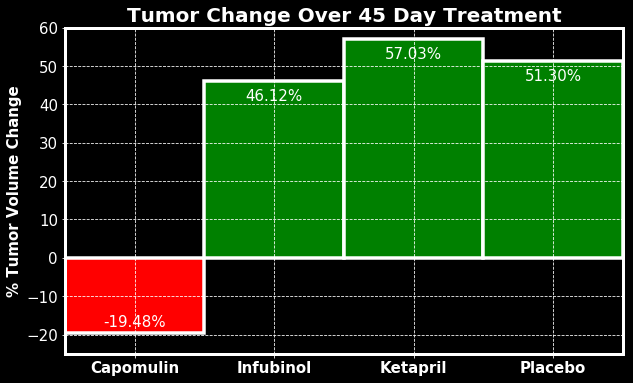

In [13]:
# Prepare parameters for bar plot
x = np.arange(0.5,4,1)
y = change.values.tolist()
color= ["red" if i<0 else "green" for i in change.values]

# Plot bar plot
fig, ax = plt.subplots()
change.plot(kind="bar", align="edge", width=1, edgecolor="w", linewidth=3.5, figsize=(10,6), grid=True, rot=0, color=color)

# Set style
plt.xlim(0, 4)
plt.ylim(-25, 60)
plt.title("Tumor Change Over 45 Day Treatment", fontsize=20, fontweight="bold")
plt.xlabel("")
plt.ylabel("% Tumor Volume Change", weight="bold")
plt.xticks(x, weight="bold")
plt.grid(ls="--")

# Add percentages as text in bars
for i in range(4):
    if y[i]>0:
        ax.text(x[i], y[i]-5, f"{y[i]:.2f}%", horizontalalignment="center")
    else:
        ax.text(x[i], y[i]+1.5, f"{y[i]:.2f}%", horizontalalignment="center")

plt.show()